In [1]:
import pyspark as ps
import numpy as np

In [2]:
sc = ps.SparkContext('local')

In [3]:
test_rdd = sc.textFile('dummy_clusters.csv')

Populating the interactive namespace from numpy and matplotlib
200
<type 'numpy.ndarray'>
[[-0.79415228  2.10495117]
 [-9.15155186 -4.81286449]]


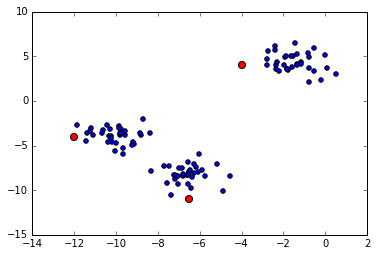

In [29]:
#Some plotting of the data and centroids just to set the scene: 
import matplotlib.pyplot as plt
%pylab inline

# Create a numpy array of the data - two columns and 100 rows
test_rows = test_rdd.map(lambda line: np.array(map(float,line.split(','))))
data = np.array(test_rows.collect())

# Lets look at what this conversion to np gives us and looks like. 
# It is a normal np array that we know how to manipulate. 
# This means is it not an RDD anymore and therefore not distributed. 
print data.size
print type(data)
print data[0:2,:]

# We choose some optimal centroids - using the same np format for our data points
optimal_centroids = [np.array([-12, -4]), np.array([-6.5, -11]), np.array([-4, 4])]
centroids = np.array(optimal_centroids)

# All of the above to plot this easily: 
plt.scatter(data[:, 0], data[:,1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

In [5]:
# KMeans method requires the feature vector, the initial centroids and the number of iterations we wish to run
# we will try to parallelise this method as much as possible. 

def Kmeans(features, centers, num_iterations):

    for i in xrange(num_iterations):
        # Assign data points to a centroid
        # notice we start using ml notation for our features, x. 
        
        assignments = features.map(lambda x: compute_assignments(x, centers))
        
        # Calculate the mean of all data points attached to a centroid and update the centroid
    
    